In [ ]:
#更動測試

In [1]:
import torch

/opt/anaconda3/envs/torch8019/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import torch
from torchvision import transforms
from PIL import Image
import os
from tqdm import tqdm
import cv2
import numpy as np
from torchvision import datasets, transforms

import torch.nn as nn
from torchvision import models
import torch.optim as optim
from torch.autograd import Variable


In [18]:
ss = pd.read_csv("21ss.csv",encoding='utf-8')
print(ss.head())
print(ss.describe())

  head_label tail_label        head_name          tail_name      ans
0    AB13185     BA6246  菱形幾合印花V領特殊袖雪紡上衣    純色高含棉拼接排釦腰鬆緊寬褲裙      fit
1    AB13185     BA6277  菱形幾合印花V領特殊袖雪紡上衣       滿版碎花吊帶連身寬版長褲  not_fit
2    AB13185     BA6383  菱形幾合印花V領特殊袖雪紡上衣  韓系彈力造型腰頭雙釦設計窄管牛仔褲      fit
3    AB13185     CA2244  菱形幾合印花V領特殊袖雪紡上衣     高含棉修身高腰後鬆緊A字長裙      fit
4    AB13185     BA6171  菱形幾合印花V領特殊袖雪紡上衣          彈力修身九分哈倫褲      fit
       head_label tail_label        head_name       tail_name   ans
count        5000       5000             5000            5000  5000
unique        250        512              250             511     3
top       AB13185     BA6183  菱形幾合印花V領特殊袖雪紡上衣  純色含棉修身後鬆緊五分短寬褲   fit
freq           20         20               20              20  4134


In [29]:
aw = pd.read_table("20aw.csv",sep=',')
print(aw.head())
print(aw.describe())
print(aw.info())

  head_label tail_label             head_name             tail_name      ans
0    AB12289     BA6034  純色翻領壓褶貝殼排扣荷葉七分袖/短袖上衣    純色高含棉坑條燈芯絨腰鬆緊五分短寬褲      fit
1    AB12289     CA2163  純色翻領壓褶貝殼排扣荷葉七分袖/短袖上衣      優雅蕾絲不易皺後腰鬆緊斜開岔短裙      fit
2    AB12289     BA5836  純色翻領壓褶貝殼排扣荷葉七分袖/短袖上衣        柔軟質感天絲棉丹寧落地大寬褲      fit
3    AB12289     BA5840  純色翻領壓褶貝殼排扣荷葉七分袖/短袖上衣  簡約知性立挺打褶造型西裝短褲．附質感皮帶      fit
4    AB12289     BA5861  純色翻領壓褶貝殼排扣荷葉七分袖/短袖上衣     休閒彈力英字印花窄管緊身長褲內搭褲  not_fit
       head_label tail_label        head_name            tail_name   ans
count        5000       5000             5000                 5000  5000
unique        250        567              248                  564     3
top       AB12289     BA5888  高含棉長版配色格紋長袖襯衫上衣  牛仔彈力造型高腰收腹割破不收邊緊身長褲   fit
freq           20         19               40                   28  2881
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      ----------

In [27]:
aw_ss = pd.concat([ss,aw],axis=0)
aw_ss = aw_ss.reset_index(drop=True)
aw_ss

,head_label,tail_label,head_name,tail_name,ans
0,AB13185,BA6246,菱形幾合印花V領特殊袖雪紡上衣,純色高含棉拼接排釦腰鬆緊寬褲裙,fit
1,AB13185,BA6277,菱形幾合印花V領特殊袖雪紡上衣,滿版碎花吊帶連身寬版長褲,not_fit
2,AB13185,BA6383,菱形幾合印花V領特殊袖雪紡上衣,韓系彈力造型腰頭雙釦設計窄管牛仔褲,fit
3,AB13185,CA2244,菱形幾合印花V領特殊袖雪紡上衣,高含棉修身高腰後鬆緊A字長裙,fit
4,AB13185,BA6171,菱形幾合印花V領特殊袖雪紡上衣,彈力修身九分哈倫褲,fit
...,...,...,...,...,...
9995,QA1179,BA5937,親子系列~可愛貓咪耳內刷毛造型衛衣/連帽上衣,彈力高腰造型排釦腰頭緊身牛仔長褲,wrong
9996,QA1179,CA2203,親子系列~可愛貓咪耳內刷毛造型衛衣/連帽上衣,滿版小碎花層次荷葉鬆緊傘襬A字長裙(厚絨內裡),wrong
9997,QA1179,BA6029,親子系列~可愛貓咪耳內刷毛造型衛衣/連帽上衣,彈力混色斜紋毛呢腰鬆緊直筒西裝褲/長褲,wrong
9998,QA1179,QA1110,親子系列~可愛貓咪耳內刷毛造型衛衣/連帽上衣,童趣感純棉好動縮口褲,wrong


In [28]:
aw_ss.to_csv("all_sample.csv",encoding='utf-8')

In [12]:
#把wrong變成no_fit 因為wrong也算是no_fit
all_sample=pd.read_csv("all_sample.csv",index_col=0)
all_sample['ans'] = all_sample['ans'].str.replace("wrong","not_fit")
all_sample

,head_label,tail_label,head_name,tail_name,ans
0,AB13185,BA6246,菱形幾合印花V領特殊袖雪紡上衣,純色高含棉拼接排釦腰鬆緊寬褲裙,fit
1,AB13185,BA6277,菱形幾合印花V領特殊袖雪紡上衣,滿版碎花吊帶連身寬版長褲,not_fit
2,AB13185,BA6383,菱形幾合印花V領特殊袖雪紡上衣,韓系彈力造型腰頭雙釦設計窄管牛仔褲,fit
3,AB13185,CA2244,菱形幾合印花V領特殊袖雪紡上衣,高含棉修身高腰後鬆緊A字長裙,fit
4,AB13185,BA6171,菱形幾合印花V領特殊袖雪紡上衣,彈力修身九分哈倫褲,fit
...,...,...,...,...,...
9995,QA1179,BA5937,親子系列~可愛貓咪耳內刷毛造型衛衣/連帽上衣,彈力高腰造型排釦腰頭緊身牛仔長褲,not_fit
9996,QA1179,CA2203,親子系列~可愛貓咪耳內刷毛造型衛衣/連帽上衣,滿版小碎花層次荷葉鬆緊傘襬A字長裙(厚絨內裡),not_fit
9997,QA1179,BA6029,親子系列~可愛貓咪耳內刷毛造型衛衣/連帽上衣,彈力混色斜紋毛呢腰鬆緊直筒西裝褲/長褲,not_fit
9998,QA1179,QA1110,親子系列~可愛貓咪耳內刷毛造型衛衣/連帽上衣,童趣感純棉好動縮口褲,not_fit


In [15]:
#fit 7015,no_fit 2181, wrong 804
#all_sample=pd.read_csv("all_sample.csv")

negative_data=all_sample[all_sample["ans"]=="not_fit"]
postive_data=all_sample[all_sample["ans"]=="fit"]


#訓練2500 測試500
train_P=postive_data.sample(3000,random_state=178)
train_N=negative_data.sample(2985,random_state=198)
test_P=train_P.sample(500,random_state=73)
test_N=train_N.sample(485,random_state=65)

train_P=train_P.drop(test_P.index)
train_N=train_N.drop(test_N.index)
#source上身代碼#下身代碼
train_P=train_P.sort_values(by=["head_label","tail_label"]).reset_index(drop=True)
train_N=train_N.sort_values(by=["head_label","tail_label"]).reset_index(drop=True)
test_P=test_P.sort_values(by=["head_label","tail_label"]).reset_index(drop=True)
test_N=test_N.sort_values(by=["head_label","tail_label"]).reset_index(drop=True)

In [3]:
#transform可以旋轉 縮放
transform=transforms.Compose([
    transforms.Resize(224), #缩放图片，保持长宽比不变，最短边的长为224像素,
    transforms.CenterCrop([150,224]), #中心裁剪，从中间切出 150*224的图片
])


In [4]:
imgs=os.listdir("OB_imgs")#回傳該路徑下有哪些檔案
pbar=tqdm(total=len(imgs))
for img in imgs:
    path="OB_imgs/"+img
    pil_img=Image.open(path)
    ttt=transform(pil_img)
    save_dir="crop_img_test/"+img
    ttt.save(save_dir)
    pbar.update(1)

pbar.close()
    

100%|██████████| 17000/17000 [07:10<00:00, 39.50it/s]


In [5]:
def v_merge_img(data_df):
    source=list(data_df["source"])
    target=list(data_df["target"])
    type=list(data_df["type"])[0]
    if(len(data_df)==2500 and type=="fit"):
        folder_name="train/fit"
    elif(len(data_df)==2500 and type=="not_fit"):
        folder_name="train/not_fit"
    elif(len(data_df)==500 and type=="fit"):
        folder_name="test/fit"
    elif(len(data_df)==500 and type=="not_fit"):
        folder_name="test/not_fit"

    if (os.path.exists(folder_name)==False):
        os.mkdir(folder_name)

    for i,top in enumerate(source):
        top_dir="crop_img_test/"+top+".png"
        bottom_dir="crop_img_test/"+target[i]+".png"
        #用opencv讀取圖片
        top_img = cv2.imread(top_dir)
        bottom_img = cv2.imread(bottom_dir)
        fit_img = np.vstack([top_img, bottom_img])  # 垂直拼接，變成上下兩個組圖

        fit_img_dir=folder_name+"/fit"+str(i)+".png"
        cv2.imwrite(fit_img_dir,fit_img)
        
   


In [6]:
v_merge_img(test_P)
v_merge_img(test_N)

v_merge_img(train_P)
v_merge_img(train_N)


In [7]:
transform2=transforms.Compose([#compose可以把調整方法串接起來
    transforms.Resize([224,224]), #缩放图片，保持长宽比不变，最短边的长为224像素,
    transforms.ToTensor(), #將圖片或是ndarray轉換成Tensor,除255歸一化至[0,1]
    transforms.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5]) #標準化至[-1,1]其實並非到0~1之間，模型才容易收斂 mean變成0 std變成1
])

batch_size=16

train_dir = "train"           
#定義數據集
train_datasets = datasets.ImageFolder(train_dir, transform=transform2)
#加載數據集
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=batch_size, shuffle=True)

val_dir = "test"		
val_datasets = datasets.ImageFolder(val_dir, transform=transform2)
val_dataloader = torch.utils.data.DataLoader(val_datasets, batch_size=batch_size, shuffle=False)

In [13]:
class VGGNet(nn.Module):
    def __init__(self, num_classes=2):
        super(VGGNet, self).__init__()
        net = models.vgg16(pretrained=False)
        net.classifier = nn.Sequential()
        self.features = net
        self.classifier = nn.Sequential(
                nn.Linear(512 * 7 * 7, 512),
                nn.ReLU(True),
                nn.Dropout(),
                nn.Linear(512, 128),
                nn.ReLU(True),
                nn.Dropout(),
                nn.Linear(128, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

In [14]:
learning_rate = 5e-5
epoch = 20

model = VGGNet()
if torch.cuda.is_available():
    model.cuda()
params = [{'params': md.parameters()} for md in model.children()
          if md in [model.classifier]]
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_func = nn.CrossEntropyLoss()

model.train()

loss_list = []
accuracy_list = []
tr_loss_list = []
tr_accuracy_list = []

for i in range(epoch):
    print('epoch {}'.format(i + 1))
    train_loss = 0.
    train_acc = 0.
    pbar=tqdm(total=len(train_dataloader))
    for img, label in train_dataloader:
        img = Variable(img).cuda()
        label = Variable(label).cuda()
        optimizer.zero_grad()
        output = model(img)
        loss = loss_func(output, label)
        train_loss += loss.item()
        pred = torch.max(output, 1)[1]
        train_correct = (pred == label).sum()
        train_acc += train_correct.item()
        loss.backward()
        optimizer.step()
        pbar.update(1)
    pbar.close()

    print('Train Loss: {:.6f}, Acc: {:.6f}'.format(train_loss / (len(train_datasets)), train_acc / (len(train_datasets))))
    tr_loss_list.append(train_loss / (len(train_datasets)))
    tr_accuracy_list.append(100 * train_acc / (len(train_datasets)))

    # evaluation--------------------------------
    model.eval()
    eval_loss = 0.
    eval_acc = 0.
    for img, label in val_dataloader:
        img = Variable(img).cuda()
        label = Variable(label).cuda()
        out = model(img)
        loss = loss_func(out, label)
        eval_loss += loss.item()
        pred = torch.max(out, 1)[1]
        num_correct = (pred == label).sum()
        eval_acc += num_correct.item()
    print('Test Loss: {:.6f}, Acc: {:.6f}'.format(eval_loss / (len(val_datasets)), eval_acc / (len(val_datasets))))
    loss_list.append(eval_loss / (len(val_datasets)))
    accuracy_list.append(100 * eval_acc / (len(val_datasets)))

c:\Users\HZT\miniconda3\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\HZT\miniconda3\envs\pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


epoch 1


100%|██████████| 313/313 [00:26<00:00, 11.74it/s]


Train Loss: 0.043431, Acc: 0.501400
Test Loss: 0.043663, Acc: 0.500000
epoch 2


100%|██████████| 313/313 [00:26<00:00, 11.72it/s]


Train Loss: 0.042762, Acc: 0.555200
Test Loss: 0.041044, Acc: 0.638000
epoch 3


100%|██████████| 313/313 [00:26<00:00, 11.70it/s]


Train Loss: 0.034240, Acc: 0.718600
Test Loss: 0.029646, Acc: 0.780000
epoch 4


100%|██████████| 313/313 [00:26<00:00, 11.69it/s]


Train Loss: 0.024366, Acc: 0.821800
Test Loss: 0.024469, Acc: 0.831000
epoch 5


100%|██████████| 313/313 [00:26<00:00, 11.69it/s]


Train Loss: 0.020202, Acc: 0.854200
Test Loss: 0.022235, Acc: 0.829000
epoch 6


100%|██████████| 313/313 [00:26<00:00, 11.69it/s]


Train Loss: 0.017708, Acc: 0.880800
Test Loss: 0.019256, Acc: 0.862000
epoch 7


100%|██████████| 313/313 [00:26<00:00, 11.68it/s]


Train Loss: 0.014784, Acc: 0.896200
Test Loss: 0.018897, Acc: 0.869000
epoch 8


100%|██████████| 313/313 [00:26<00:00, 11.65it/s]


Train Loss: 0.011788, Acc: 0.918400
Test Loss: 0.019093, Acc: 0.883000
epoch 9


100%|██████████| 313/313 [00:26<00:00, 11.65it/s]


Train Loss: 0.009172, Acc: 0.941800
Test Loss: 0.016565, Acc: 0.895000
epoch 10


100%|██████████| 313/313 [00:26<00:00, 11.65it/s]


Train Loss: 0.006616, Acc: 0.959200
Test Loss: 0.016939, Acc: 0.905000
epoch 11


100%|██████████| 313/313 [00:26<00:00, 11.65it/s]


Train Loss: 0.005378, Acc: 0.967800
Test Loss: 0.017239, Acc: 0.901000
epoch 12


100%|██████████| 313/313 [00:26<00:00, 11.65it/s]


Train Loss: 0.003815, Acc: 0.977000
Test Loss: 0.019775, Acc: 0.904000
epoch 13


100%|██████████| 313/313 [00:26<00:00, 11.65it/s]


Train Loss: 0.003330, Acc: 0.979800
Test Loss: 0.025471, Acc: 0.883000
epoch 14


100%|██████████| 313/313 [00:26<00:00, 11.66it/s]


Train Loss: 0.002584, Acc: 0.986200
Test Loss: 0.028147, Acc: 0.914000
epoch 15


100%|██████████| 313/313 [00:26<00:00, 11.65it/s]


Train Loss: 0.002111, Acc: 0.987600
Test Loss: 0.025024, Acc: 0.906000
epoch 16


100%|██████████| 313/313 [00:26<00:00, 11.66it/s]


Train Loss: 0.000946, Acc: 0.996400
Test Loss: 0.029868, Acc: 0.918000
epoch 17


100%|██████████| 313/313 [00:26<00:00, 11.65it/s]


Train Loss: 0.001909, Acc: 0.991000
Test Loss: 0.023016, Acc: 0.915000
epoch 18


100%|██████████| 313/313 [00:26<00:00, 11.67it/s]


Train Loss: 0.001432, Acc: 0.993600
Test Loss: 0.032528, Acc: 0.915000
epoch 19


100%|██████████| 313/313 [00:26<00:00, 11.67it/s]


Train Loss: 0.001031, Acc: 0.994800
Test Loss: 0.029290, Acc: 0.901000
epoch 20


100%|██████████| 313/313 [00:26<00:00, 11.68it/s]


Train Loss: 0.001446, Acc: 0.993000
Test Loss: 0.033392, Acc: 0.910000


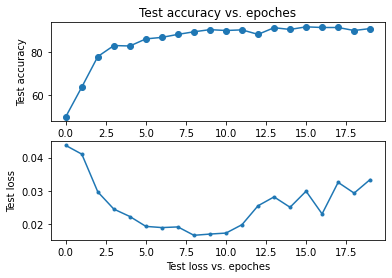

In [15]:
import matplotlib.pyplot as plt

x1 = range(0, 20)
x2 = range(0, 20)
y1 = accuracy_list
y2 = loss_list
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('Test accuracy vs. epoches')
plt.ylabel('Test accuracy')
plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('Test loss vs. epoches')
plt.ylabel('Test loss')
plt.show()
# plt.savefig("accuracy_loss.jpg")


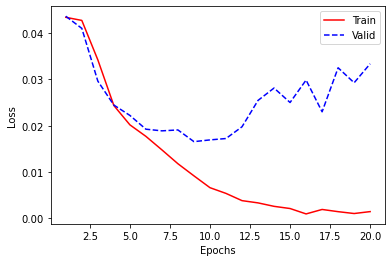

In [16]:
#distplot
import matplotlib.pyplot as plt
epochs =[i+1 for i in range(20)]
plt.plot(epochs,tr_loss_list, color='red', label='Train')
plt.plot(epochs,loss_list, '--', color='blue', label='Valid')
#plt.title('CrossEntropy') # title
plt.ylabel("Loss") # y label
plt.xlabel("Epochs") # x label
plt.legend() #圖例
#plt.savefig('.\\Model\\0618\\t_model_' + str(isbalence) + 'bz' + str(batch_sizes) + '_' + str(num_epochs) + '.png') #儲存圖檔
#plt.savefig('.\\Model\\0618\\實驗' + str(testnum) + '.png') #儲存圖檔
plt.show()

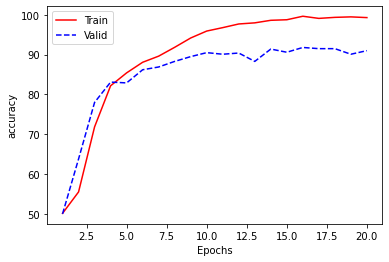

In [19]:
#distplot
import matplotlib.pyplot as plt
epochs =[i+1 for i in range(20)]
plt.plot(epochs,tr_accuracy_list, color='red', label='Train')
plt.plot(epochs,accuracy_list, '--', color='blue', label='Valid')
#plt.title('CrossEntropy') # title
plt.ylabel("accuracy") # y label
plt.xlabel("Epochs") # x label
plt.legend() #圖例
#plt.savefig('.\\Model\\0618\\t_model_' + str(isbalence) + 'bz' + str(batch_sizes) + '_' + str(num_epochs) + '.png') #儲存圖檔
#plt.savefig('.\\Model\\0618\\實驗' + str(testnum) + '.png') #儲存圖檔
plt.show()

In [18]:
torch.save(model.state_dict(), "VGG16_0809_91.pt")
